<h1 align="center">Assignment No :- 04</h1> 

# Title :- 
Apply Basic PCA on the iris dataset. The data set is available at:- https://raw.github.com/neurospin/pystatsml/master/datasets/iris.csv
1. Describe the data set. Should the dataset been standardized?
2. Describe the structure of correlations among variables.
3. Compute a PCA with the maximum number of components
4. Compute the cumulative explained variance ratio. Determine the number of components𝐾by your computed values.
5. Print the𝐾principal components directions and correlations of the𝐾principal
6. compo-nents with the original variables. Interpret the contribution of the original variables into the PC.
7. Plot the samples projected into the𝐾first PCs.
8. Color samples by their species.

# **Principle Component Analysis on Iris Dataset**

## Iris Dataset:
__The dataset consists of four attributes:__ sepal-width, sepal-length, petal-width and petal-length.(All in cm)<br>
These are the attributes of specific types of iris plant. <br>
There are three classes in the dataset: __Iris-setosa, Iris-versicolor and Iris-virginica.__<br>
![Image of Iris Flowers](https://miro.medium.com/max/1000/1*lFC_U5j_Y8IXF4Ga87KNVg.png)


## How PCA works?

Understanding PCA without visuals is difficult so let's see the video <br>
__[PCA Concept explanation](https://www.youtube.com/watch?v=_UVHneBUBW0&t=2s)__

- PCA finds the principal components of data.
- Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. 
- Principal components are new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible.    
- It is often useful to measure data in terms of its principal components rather than on a normal x-y axis. 
- So what are principal components then? They’re the underlying structure in the data. They are the directions where there is the most variance, the directions where the data is most spread out. 

- PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. - It means more important principle axis occurs first. (more important = more variance/more spread out data)

**How does PCA work -**

1. Calculate the covariance matrix X of data points.
2. Calculate eigen vectors and corresponding eigen values.
3. Sort the eigen vectors according to their eigen values in decreasing order.
4. Choose first k eigen vectors and that will be the new k dimensions.
5. Transform the original n dimensional data points into k dimensions.


For Eigen term details : http://setosa.io/ev/eigenvectors-and-eigenvalues/

### Implementing PCA 
#### Step 1: Standardization of the data

- Standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.
- Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.

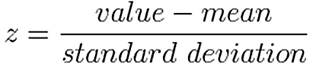

#### Step 2: Calculate the covariance matrix
- The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. 
- Because sometimes, variables are highly correlated in such a way that they contain redundant information. 
- So, in order to identify these correlations, we compute the covariance matrix.
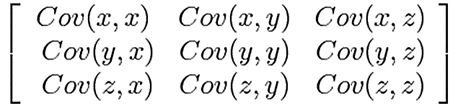
- Since the dataset we took is 4-dimensional, this will result in a 4x4 Covariance matrix.
 

*Please note that Var[X] = Cov[X,X] and Var[Y] = Cov[Y,Y].*

#### Step 3: Calculate the eigenvalues and eigenvectors
- ***The eigenvectors of the Covariance matrix*** are actually the directions of the axes where there is the most variance(most information) and that we call Principal Components. 
- ***And eigenvalues*** are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

To calculate the eigenvalues and eigenvectors for the covariance matrix:
ƛ is an eigenvalue for a matrix A if it is a solution of the characteristic equation:

det( ƛI - A ) = 0

Where, I is the identity matrix of the same dimension as A which is a required condition for the matrix subtraction as well in this case and ‘det’ is the determinant of the matrix. For each eigenvalue ƛ, a corresponding eigen-vector v, can be found by solving:

( ƛI - A )v = 0

#### Step 4: Choosing components and forming a feature vector:
- In this step, we choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.
- We order the eigenvalues from largest to smallest so that it gives us the components in order or significance. 
- Here comes the **dimensionality reduction** part. If we have a dataset with n variables, then we have the corresponding n eigenvalues and eigenvectors. 
- It turns out that the eigenvector corresponding to the highest eigenvalue is the principal component of the dataset and it is our call as to how many eigenvalues we choose to proceed our analysis with. 
- To reduce the dimensions, we choose the first p eigenvalues and ignore the rest. 
- We do lose out some information in the process, but if the eigenvalues are small, we do not lose much.

#### Step 5: Recast/Project the data along the Principal Components axes
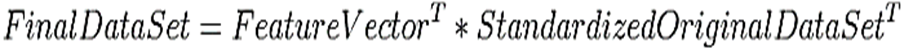

# IMPLEMENTATION

In [1]:
# Importing Necessary libraries
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("Iris.csv",index_col='Id')
iris.head()   

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### 1. Describing the dataset

In [3]:
iris.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


**Insight:**
- 4 attributes/variables are numerical in same units (similar scale)
- Target is categorical variable

#### Should the dataset been standardized?

As all the attributes are in same units (cm), no need of standardization

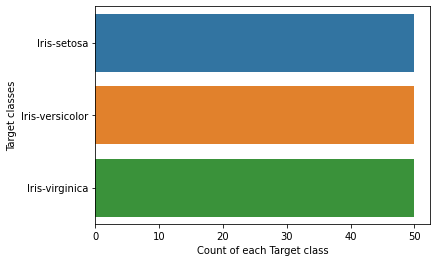

In [5]:
sns.countplot(y=iris.Species ,data=iris)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

#### Early Insights : 
1. 150 rows
2. 4 Independent variables to act as factors
3. All have same units of measurement (cm)
4. No missing data
5. Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'
6. No class imbalance, all target classes have equal number of rows (50 each).

### 2. Describing structure of correlation among variables

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

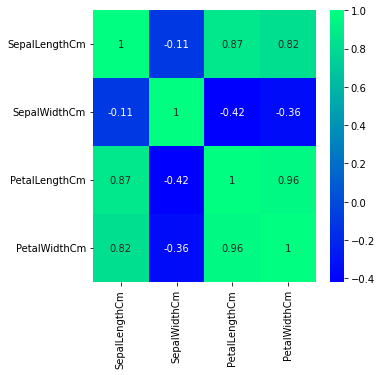

In [6]:
plt.figure(figsize=(5,5))
p=sns.heatmap(iris.corr(method='pearson'), annot=True,cmap='winter') 

- Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.
- Further, the two variables being considered may have a non-Gaussian distribution.
- In this case, the **Spearman’s correlation coefficient** (named for Charles Spearman) can be used to summarize the strength between the two data samples. <br>
- This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)))

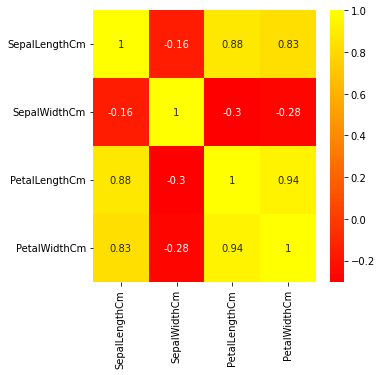

In [7]:
plt.figure(figsize=(5,5))
p=sns.heatmap(iris.corr(method='spearman'), annot=True,cmap='autumn') 

**Insight:**
- One of the biggest aims of these sort of plots is to identify features that are not much helpful in explaining the target outcome. 
- The SepalWidthCm feature seems to be less relevant in explaining the target class as compared to the other features

### 3. Computing PCA

Let's separate attributes/features from Target

i.e. 

Features =>  X = Sepal Length, Sepal Width, Petal Length, Petal Width <br>
Target   =>  y = Species

In [8]:
X = iris.drop(['Species'],axis=1)   # we can use iris.iloc[:,0:3]  --> Features
y = iris.Species                    # iris.iloc[:,-1]              --> Target

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)      #applying PCA on X
print(type(X_new))

<class 'numpy.ndarray'>


In [10]:
pca.get_covariance()     # covariance matrix for X

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

### 4. Computing the cumulative explained variance ratio.

In [11]:
explained_variance=pca.explained_variance_ratio_*100    # % of information carried by each PC
explained_variance

array([92.46162072,  5.30155679,  1.71851395,  0.51830855])

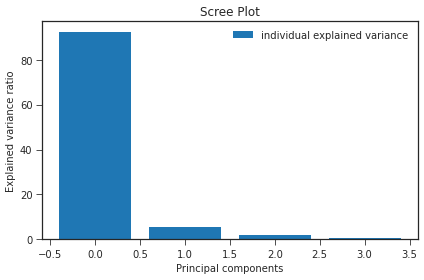

In [12]:
with plt.style.context('seaborn-ticks'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4),explained_variance,label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('Scree Plot')
    plt.tight_layout()

In [13]:
CEVR = pca.explained_variance_ratio_.cumsum()   # cumsum fn calculates cumulative sum

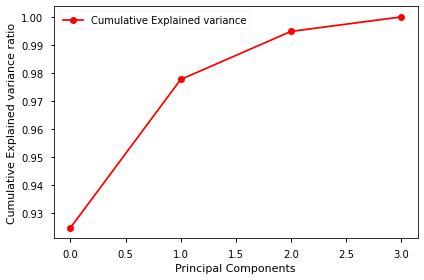

In [14]:
with plt.style.context('seaborn-notebook'):
    plt.figure(figsize=(6, 4))

    plt.plot(range(4),CEVR,"ro-", label='Cumulative Explained variance')
    plt.ylabel('Cumulative Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

### 5. Determining the number of components 𝐾 by computed values. 

**Insight:**
From above plot we can see that PC1 and PC2 contribute aprrox. 98% of information.<br>
Hence, K = 2

### 6. Printing the 𝐾 principal components directions and correlations of the 𝐾 principal components with the original variables.
(Original Variables are features)

In [15]:
pca=PCA(n_components=2)     # Apply PCA with k= 2 components
X_pca=pca.fit_transform(X)  
X_pca.shape   # 2 features are our chosen 2 principal components
#print(type(X_pca))

(150, 2)

**pca.components_** gives Principal axes in feature space, representing the **directions** of maximum variance in the data. Components are sorted by **explained_variance_** 

In [16]:
pca.components_      # First row PC1 and second row PC2

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [17]:
loadings = pd.DataFrame(pca.components_.T,columns=['PC1','PC2'], index=X.columns)
loadings

,PC1,PC2
SepalLengthCm,0.361590,0.656540
SepalWidthCm,-0.082269,0.729712
PetalLengthCm,0.856572,-0.175767
PetalWidthCm,0.358844,-0.074706


**NOTE:**<br>
- The **columns** of the dataframe contain the **eigenvectors** associated with the first two principal components.<br>
- Each **element** represents a loading, namely how much (**the weight**) each original variable contributes to the corresponding principal component.

In [18]:
loadingmats = pca.components_.T * np.sqrt(pca.explained_variance_ratio_)

loading_matrix = pd.DataFrame(loadingmats, columns=['PC1', 'PC2'], index=X.columns)
loading_matrix

,PC1,PC2
SepalLengthCm,0.347694,0.151169
SepalWidthCm,-0.079107,0.168017
PetalLengthCm,0.823654,-0.040471
PetalWidthCm,0.345053,-0.017201


- Here **each entry** of the matrix contains the **correlation between the original variable and the principal component**.<br> 
- For example the original variable sepal length (cm) and the first principal component PC1 have a correlation of 0.34.

### 7.	Interpreting the contribution of the original variables into the PC. 

**Insight:**
From above results we can say that<br>
- Petal Length contributes most to PC1
- Sepal Length and width contribute almost equally to PC2 
- Positive loading indicate feature contributing towards the outcome

- Negative loading indicate feature contributing in opposite direction to the outcome

### 8. Plotting the samples projected into the 𝐾 first PCs 
### and 
### 9. Coloring samples by their species.

In [19]:
'''
the code projects the original data which is 4 dimensional into 2 dimensions.
After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. 
The new components are just the two main dimensions of variation.
'''
principalDf = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
iris = iris.reset_index(drop=True)  # reset the index to 0
finalDf = pd.concat([principalDf, iris[['Species']]], axis = 1)
# Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.
finalDf.head()

,PC1,PC2,Species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


Text(0.5, 1.0, 'Sample Projection on Principal Components')

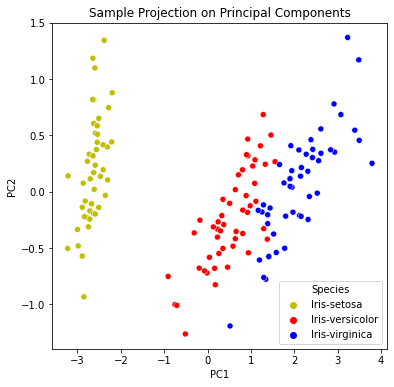

In [20]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.scatterplot(x= finalDf['PC1'], y=finalDf['PC2'],hue=finalDf['Species'], palette=['y','r','b']);
plt.title('Sample Projection on Principal Components')

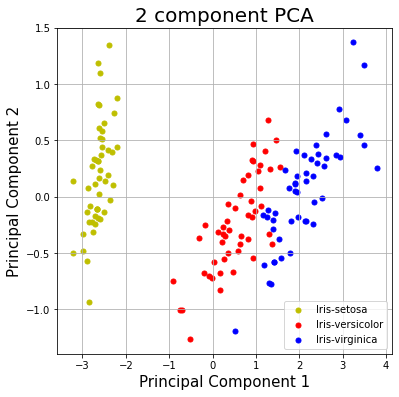

In [21]:
# Plotting the data
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['y', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 25)
ax.legend(targets)
ax.grid()